In [2]:
# --- SETUP CELL: Import Libraries and Load Data ---

# Import the core data science library
import pandas as pd

# Import the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame called 'df'
# This path works because your new notebook is in the 'archive' folder
file_path = 'analysis/energy_vs_carbon_vs_time.csv'
df = pd.read_csv(file_path)

# Optional: Display the first 5 rows to confirm it's loaded correctly
print("Setup complete. DataFrame 'df' is loaded and ready.")
df.head()

Setup complete. DataFrame 'df' is loaded and ready.


,method,energy_mean_μJ,time_mean_s,carbon_mean_gCO2eq
0,cpython,6.692408e+07,11.684,0.032
1,ctypes,1.791987e+07,2.898,0.009
2,cython,2.666747e+07,4.767,0.013
3,pycompile,6.558652e+07,12.688,0.031
4,pypy,2.674609e+07,4.581,0.013


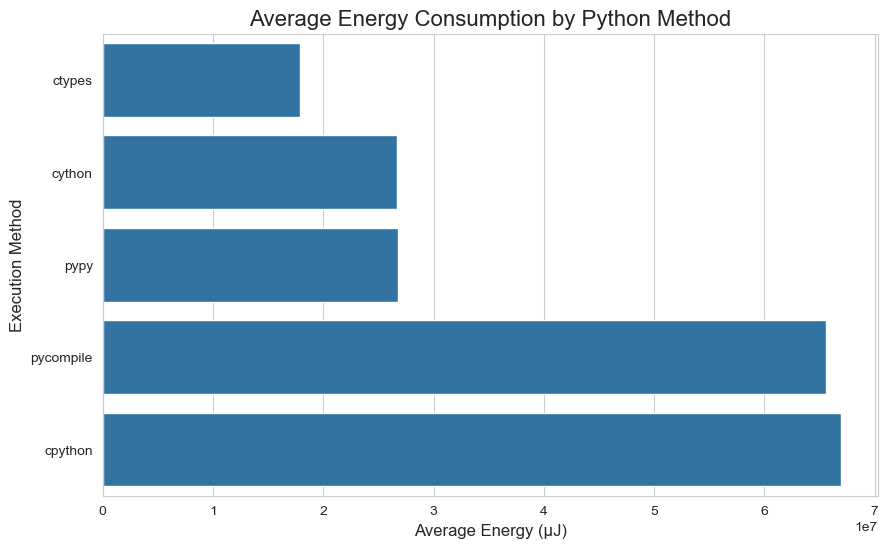

In [3]:
# Set a nice style for the plots
sns.set_style("whitegrid")

# --- Create a Bar Chart for Energy Consumption ---

# Create a figure with a specific size for better readability of the method names
plt.figure(figsize=(10, 6))

# Use Seaborn to create a horizontal bar plot
# We sort the values so the chart is ordered from most to least efficient
sns.barplot(x='energy_mean_μJ', y='method', data=df.sort_values('energy_mean_μJ'))

# Add a title and labels to make the chart easy to understand
plt.title('Average Energy Consumption by Python Method', fontsize=16)
plt.xlabel('Average Energy (μJ)', fontsize=12)
plt.ylabel('Execution Method', fontsize=12)

# Save the figure to a file before displaying it
plt.savefig('energy_consumption_barchart.png', bbox_inches='tight')

# Display the plot
plt.show()

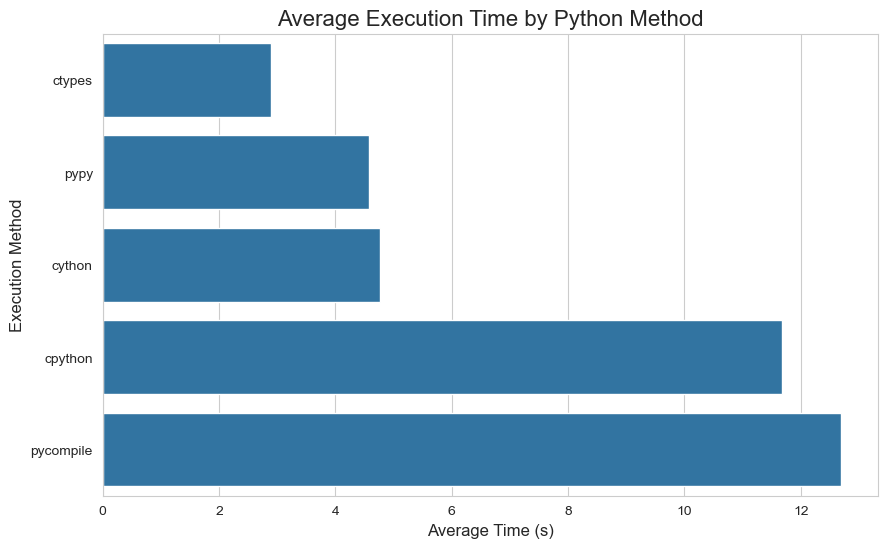

In [4]:
# --- Create a Bar Chart for Execution Time ---

plt.figure(figsize=(10, 6))

# The only change is in the x-axis and the sort_values column
sns.barplot(x='time_mean_s', y='method', data=df.sort_values('time_mean_s'))

plt.title('Average Execution Time by Python Method', fontsize=16)
plt.xlabel('Average Time (s)', fontsize=12)
plt.ylabel('Execution Method', fontsize=12)

# Save the new figure
plt.savefig('time_consumption_barchart.png', bbox_inches='tight')

plt.show()

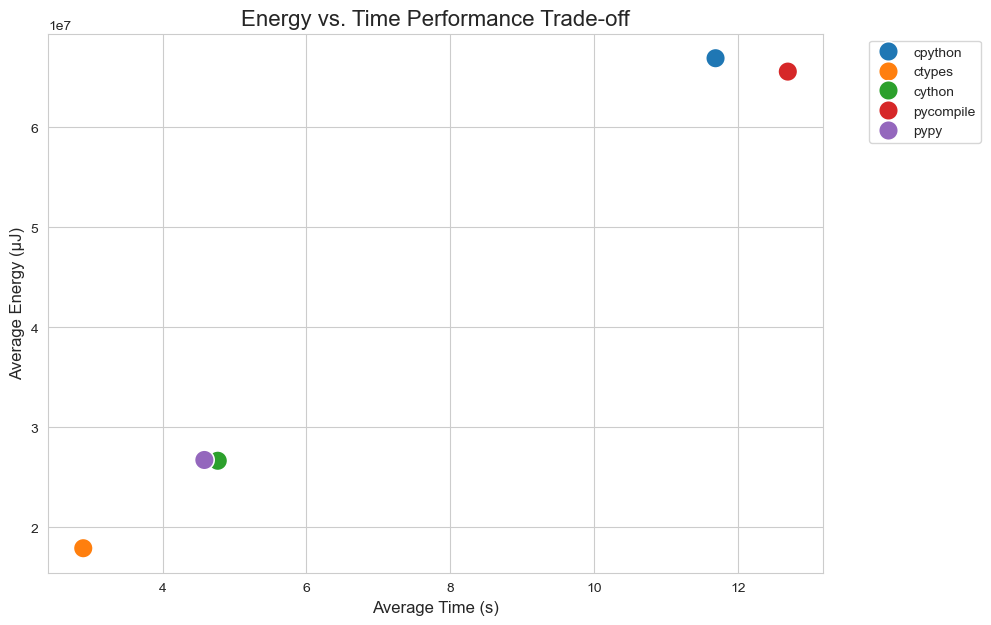

In [5]:
# --- Create a Scatter Plot for Energy vs. Time ---

plt.figure(figsize=(10, 7))

# Use Seaborn to create a scatter plot
# We'll make the dots larger (s=200) and add a 'hue' to give each method a different color
sns.scatterplot(x='time_mean_s', y='energy_mean_μJ', hue='method', data=df, s=200)

# Add a title and labels
plt.title('Energy vs. Time Performance Trade-off', fontsize=16)
plt.xlabel('Average Time (s)', fontsize=12)
plt.ylabel('Average Energy (μJ)', fontsize=12)

# Optional: Place the legend outside the plot for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the new figure
plt.savefig('energy_vs_time_scatterplot.png', bbox_inches='tight')

plt.show()

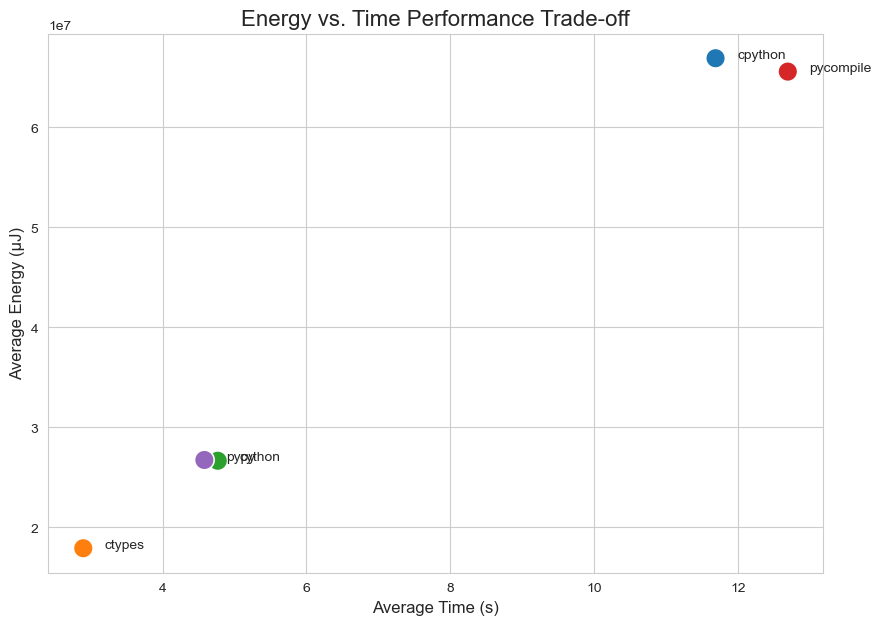

In [7]:
# --- Create a Scatter Plot with ANNOTATIONS (Corrected Code) ---

plt.figure(figsize=(10, 7))

# 1. Create the scatter plot, but turn the legend off directly
sns.scatterplot(x='time_mean_s', y='energy_mean_μJ', hue='method', data=df, s=200, legend=False)

# 2. Add the text labels using a more robust loop
for index, row in df.iterrows():
    plt.text(x=row['time_mean_s'] + 0.3,        # Add a small offset to the x-position
             y=row['energy_mean_μJ'],              # Use the exact y-position
             s=row['method'])                      # The text is the method name

# 3. Add titles and labels
plt.title('Energy vs. Time Performance Trade-off', fontsize=16)
plt.xlabel('Average Time (s)', fontsize=12)
plt.ylabel('Average Energy (μJ)', fontsize=12)

# 4. Save and show the plot
plt.savefig('energy_vs_time_annotated.png', bbox_inches='tight')
plt.show()

## Project Summary & Conclusion

### 1. The Goal
The objective of this analysis was to explore the energy consumption and performance of different Python execution methods. By analyzing the "Python Energy Microscope" dataset, the goal was to identify which methods were the most efficient.

### 2. Key Findings
The exploratory data analysis and visualizations revealed several key insights:
* There is a massive performance difference between the methods. The most efficient method, **`ctypes`**, was nearly 4 times more energy-efficient and significantly faster than the least efficient methods.
* The standard Python interpreter, **`cpython`**, was one of the least performant in both speed and energy consumption.
* A clear trade-off was observed between **`cython`** and **`pypy`**, with `pypy` being slightly faster but `cython` being slightly more energy-efficient.

### 3. Conclusion
This analysis proves that the choice of execution method is not a minor optimization but a critical factor in software performance. For tasks where both speed and energy efficiency are paramount, specialized methods like `ctypes` offer a substantial advantage over standard Python.

In [8]:
# --- Step 1: Prepare the Data ---
from sklearn.preprocessing import StandardScaler

# Select only the numerical features for the model
features = df[['energy_mean_μJ', 'time_mean_s']]

# Scale the features
# This makes sure both energy and time are treated equally by the algorithm
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("Data has been selected and scaled, ready for clustering.")

Data has been selected and scaled, ready for clustering.


C:\Users\Chaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

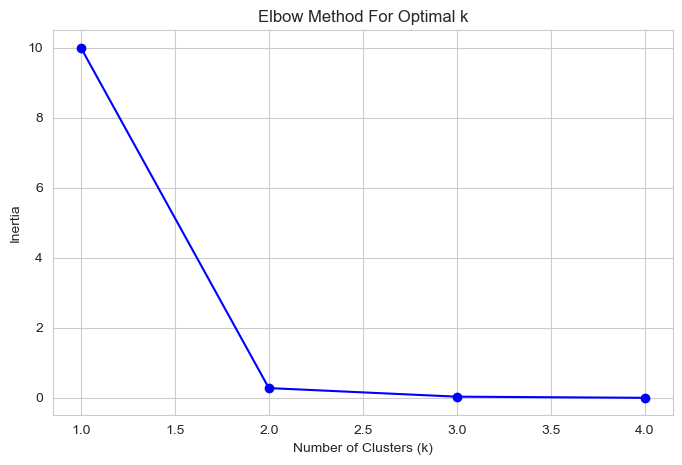

In [9]:
# --- Step 2: Find the Optimal 'K' with the Elbow Method ---
from sklearn.cluster import KMeans

inertia = []
K = range(1, 5) # We'll test for 1, 2, 3, and 4 clusters

for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(features_scaled)
    inertia.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# --- Step 3: Run the K-Means Model ---

# Initialize and train the model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(features_scaled)

# Get the cluster labels for each method
cluster_labels = kmeans.labels_

# Add the cluster labels back to our original DataFrame to see the results
df['performance_tier'] = cluster_labels

print("Clustering complete. Here are the results:")
# Display the DataFrame with the new 'performance_tier' column
df

Clustering complete. Here are the results:


C:\Users\Chaya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,method,energy_mean_μJ,time_mean_s,carbon_mean_gCO2eq,performance_tier
0,cpython,6.692408e+07,11.684,0.032,1
1,ctypes,1.791987e+07,2.898,0.009,0
2,cython,2.666747e+07,4.767,0.013,0
3,pycompile,6.558652e+07,12.688,0.031,1
4,pypy,2.674609e+07,4.581,0.013,0


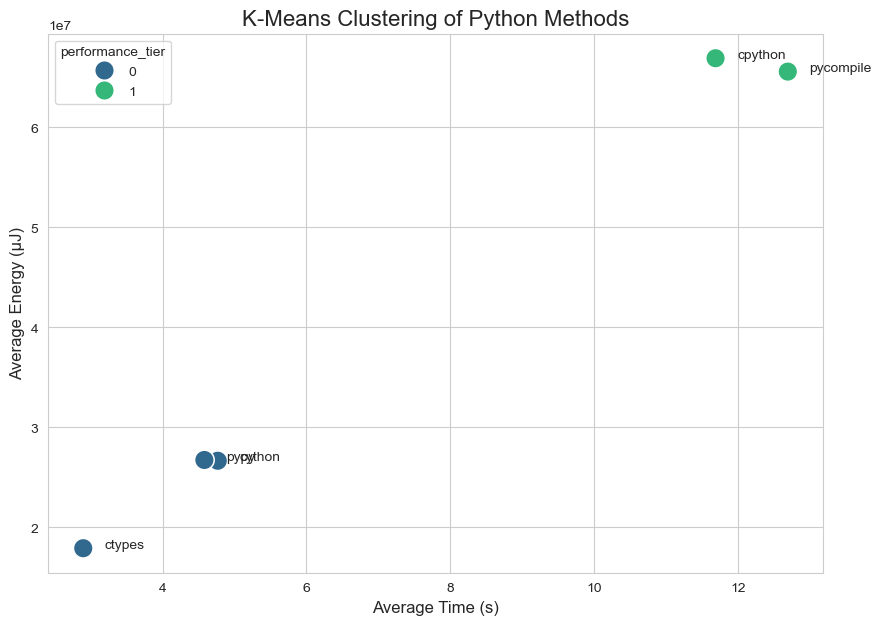

In [11]:
# --- Step 4: Visualize the Clusters ---

plt.figure(figsize=(10, 7))

# Create a scatter plot, but this time color the points by 'performance_tier'
sns.scatterplot(x='time_mean_s', y='energy_mean_μJ', hue='performance_tier', data=df, s=200, palette='viridis')

# Add the method names as labels so we know which point is which
for index, row in df.iterrows():
    plt.text(x=row['time_mean_s'] + 0.3, 
             y=row['energy_mean_μJ'], 
             s=row['method'])

plt.title('K-Means Clustering of Python Methods', fontsize=16)
plt.xlabel('Average Time (s)', fontsize=12)
plt.ylabel('Average Energy (μJ)', fontsize=12)

plt.savefig('kmeans_clusters_scatterplot.png', bbox_inches='tight')
plt.show()

In [12]:
# --- Evaluate the Clustering with Silhouette Score ---
from sklearn.metrics import silhouette_score

# Calculate the score
# It compares the scaled features with the labels the model assigned
score = silhouette_score(features_scaled, kmeans.labels_)

print(f"The Silhouette Score for our clustering is: {score:.2f}")

The Silhouette Score for our clustering is: 0.88
